In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def get_outliers_iqr(data: pd.Series):
    return irq(data, return_outliers=True)

def get_filtered_data_iqr(data: pd.Series):
    return irq(data, return_outliers=False)

def irq(data: pd.Series, return_outliers=True): 
    '''if not gettign outliers it will return the filtered data'''
    Q1 = data.quantile(0.25) # 25th percentile
    Q3 = data.quantile(0.75) # 75th percentile
    IQR = Q3 - Q1            # IQR represents the middle 50% of the data
    
    
    lower_whisker = Q1 - 1.5 * IQR 
    upper_whisker = Q3 + 1.5 * IQR # Here we can increase 1.5 to 2 to keep scores that are like a presentation. 
    outliers = data[(data < lower_whisker) | (data > upper_whisker)]
    filtered_data = data[(data >= lower_whisker) & (data <= upper_whisker)] # Filtered data without outliers
    print(f"*q1 = {Q1}, q3 = {Q3}, IQR = {IQR}, lower_whisker = {lower_whisker}, upper_whisker = {upper_whisker}")
    return filtered_data if not return_outliers else outliers

# Example usage
data = pd.Series([8, 9, 10, 7, 5, 9, 10])
outliers = get_outliers_iqr(data)
print("Outliers:\n", outliers)


*q1 = 7.5, q3 = 9.5, IQR = 2.0, lower_whisker = 4.5, upper_whisker = 12.5
Outliers:
 Series([], dtype: int64)


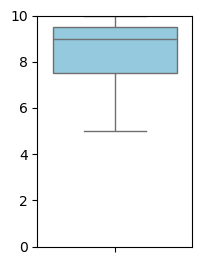

In [17]:


# Plotting the data as a boxplot
def graph_data(data):
    plt.figure(figsize=(2, 3))
    ax = sns.boxplot(data=data, color='skyblue')
    ax.set_ylim(0, 10)
    plt.show()
    
    
graph_data(data)


In [18]:
# !pip install openpyxl
from typing import List, Tuple


columns_to_read = [
    "Email Address",
    "Overall grade to this team's Slide deck?",
    "Overall grade to this team's Presentation skills?",
    "Overall grade to this team's Research topic and (summary) paper content?"
]

data = pd.read_excel("S24-574-all-responses.xlsx", usecols=columns_to_read)
# In between the rwos there would be a row that is completely empty. - that is where the data splits 
# We need to group every data between a empty row, inside the data make the 3 rows into array 

# Initialize variables
formatted_data = []
current_group: List[List[int]] = []

# Iterate through the DataFrame
for index, row in data.iterrows():
    if row.isnull().all():
        if current_group:
            formatted_data.append(tuple(current_group))
            current_group = []
    else:
        current_group.append(row.values.tolist())

# Append the last group if it exists
if current_group:
    formatted_data.append(tuple(current_group))

transposed_data : List[Tuple[List[str], List[int], List[int], List[int]]]= [list(map(list, zip(*group))) for group in formatted_data]
# transposed_data


In [19]:
presentation_data = transposed_data 


                               _ 
  __ _ _ __ ___  _   _ _ __   / |
 / _` | '__/ _ \| | | | '_ \  | |
| (_| | | | (_) | |_| | |_) | | |
 \__, |_|  \___/ \__,_| .__/  |_|
 |___/                |_|        

average_before_cleaning = 7.553571428571429
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 2     3.0
21    3.0
36    1.0
38    1.0
dtype: float64
average_after_cleaning = 7.980769230769231


average_before_cleaning = 7.696428571428571
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 2     3.0
21    2.0
36    1.0
38    1.0
dtype: float64
average_after_cleaning = 8.153846153846153


average_before_cleaning = 7.625
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:

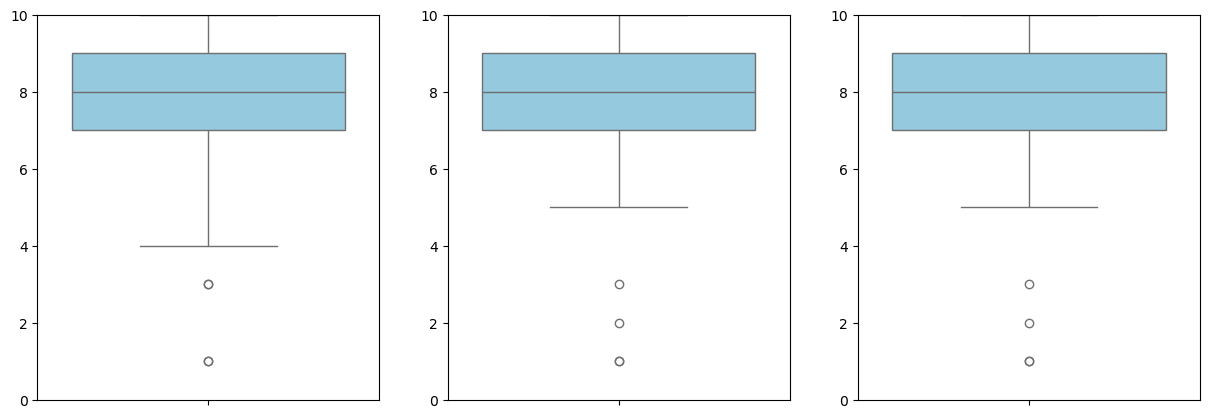

                               ____  
  __ _ _ __ ___  _   _ _ __   |___ \ 
 / _` | '__/ _ \| | | | '_ \    __) |
| (_| | | | (_) | |_| | |_) |  / __/ 
 \__, |_|  \___/ \__,_| .__/  |_____|
 |___/                |_|            

average_before_cleaning = 7.781818181818182
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 17    1.0
40    3.0
46    2.0
52    2.0
53    2.0
dtype: float64
average_after_cleaning = 8.36


average_before_cleaning = 7.7272727272727275
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 17    1.0
40    2.0
46    3.0
52    3.0
53    1.0
dtype: float64
average_after_cleaning = 8.3


average_before_cleaning = 7.836363636363636
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5

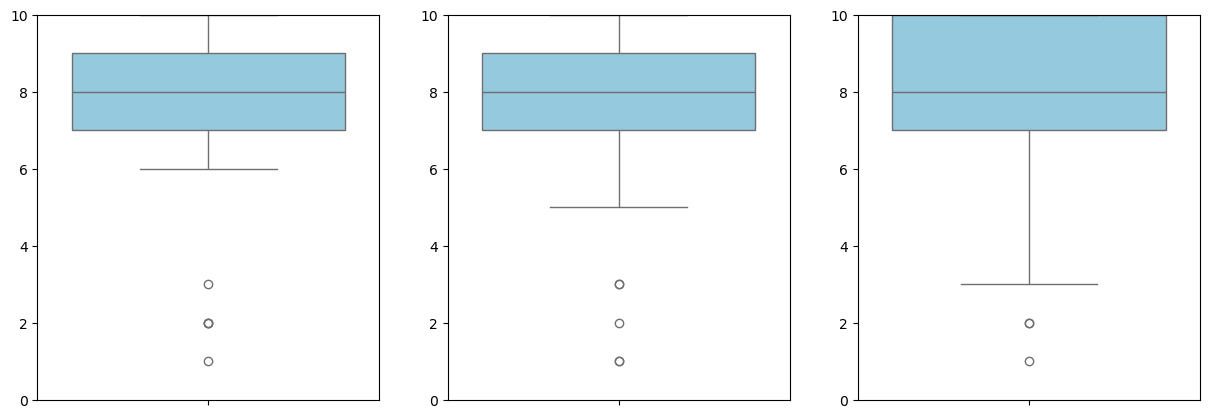

                               _____ 
  __ _ _ __ ___  _   _ _ __   |___ / 
 / _` | '__/ _ \| | | | '_ \    |_ \ 
| (_| | | | (_) | |_| | |_) |  ___) |
 \__, |_|  \___/ \__,_| .__/  |____/ 
 |___/                |_|            

average_before_cleaning = 7.920634920634921
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 28    2.0
37    1.0
38    1.0
45    2.0
52    2.0
56    2.0
dtype: float64
average_after_cleaning = 8.578947368421053


average_before_cleaning = 7.9523809523809526
*q1 = 7.5, q3 = 9.0, IQR = 1.5, lower_whisker = 5.25, upper_whisker = 11.25
*q1 = 7.5, q3 = 9.0, IQR = 1.5, lower_whisker = 5.25, upper_whisker = 11.25
Outliers:
 4     5.0
28    2.0
37    3.0
38    2.0
45    3.0
52    2.0
56    1.0
dtype: float64
average_after_cleaning = 8.625


average_before_cleaning = 8.015873015873016
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 

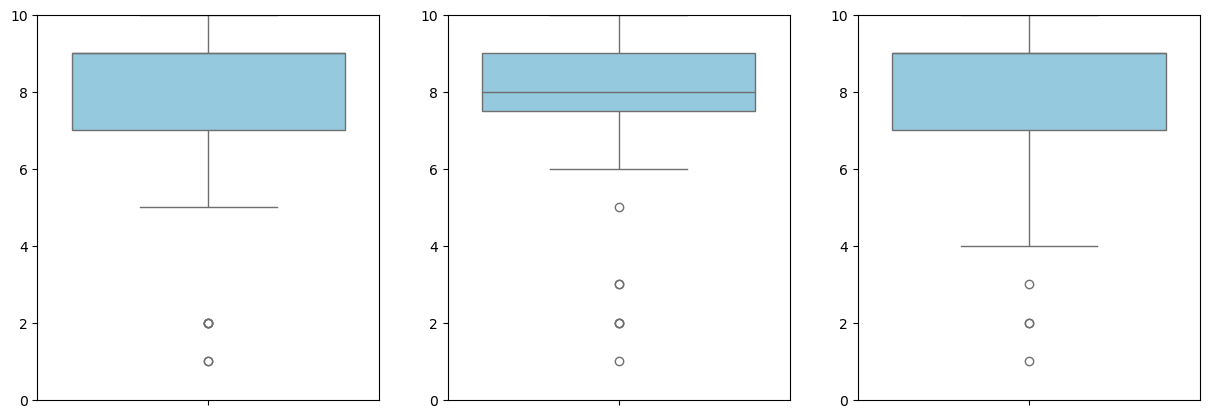

                               _  _   
  __ _ _ __ ___  _   _ _ __   | || |  
 / _` | '__/ _ \| | | | '_ \  | || |_ 
| (_| | | | (_) | |_| | |_) | |__   _|
 \__, |_|  \___/ \__,_| .__/     |_|  
 |___/                |_|             

average_before_cleaning = 8.311475409836065
*q1 = 8.0, q3 = 10.0, IQR = 2.0, lower_whisker = 5.0, upper_whisker = 13.0
*q1 = 8.0, q3 = 10.0, IQR = 2.0, lower_whisker = 5.0, upper_whisker = 13.0
Outliers:
 24    4.0
37    3.0
43    4.0
47    1.0
59    1.0
dtype: float64
average_after_cleaning = 8.821428571428571


average_before_cleaning = 8.344262295081966
*q1 = 8.0, q3 = 10.0, IQR = 2.0, lower_whisker = 5.0, upper_whisker = 13.0
*q1 = 8.0, q3 = 10.0, IQR = 2.0, lower_whisker = 5.0, upper_whisker = 13.0
Outliers:
 24    3.0
37    3.0
43    3.0
47    2.0
59    2.0
dtype: float64
average_after_cleaning = 8.857142857142858


average_before_cleaning = 8.278688524590164
*q1 = 8.0, q3 = 10.0, IQR = 2.0, lower_whisker = 5.0, upper_whisker = 13.0
*q1 = 8.0, q3 = 

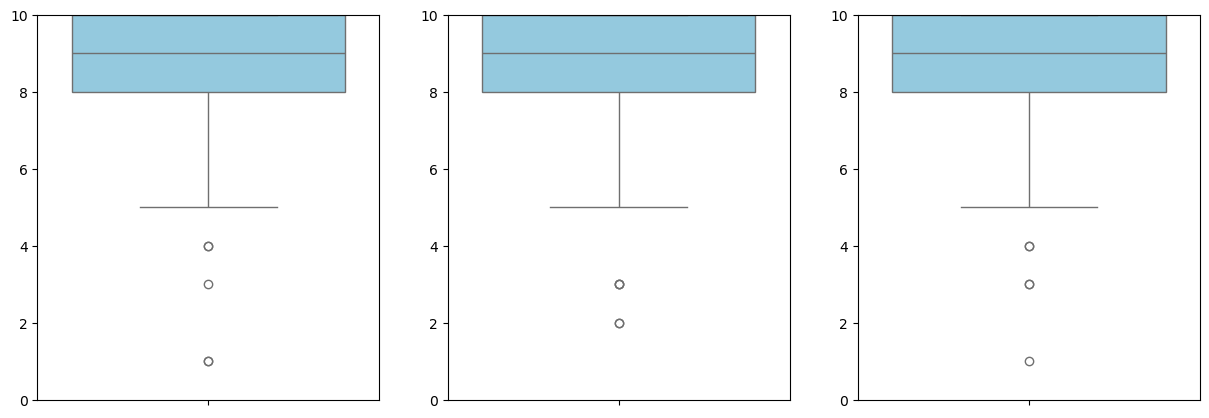

                               ____  
  __ _ _ __ ___  _   _ _ __   | ___| 
 / _` | '__/ _ \| | | | '_ \  |___ \ 
| (_| | | | (_) | |_| | |_) |  ___) |
 \__, |_|  \___/ \__,_| .__/  |____/ 
 |___/                |_|            

average_before_cleaning = 7.8
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
Outliers:
 3     2.0
24    2.0
28    2.0
30    2.0
32    1.0
53    1.0
dtype: float64
average_after_cleaning = 8.423728813559322


average_before_cleaning = 7.7846153846153845
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 3     3.0
24    2.0
28    1.0
30    1.0
32    2.0
53    2.0
dtype: float64
average_after_cleaning = 8.389830508474576


average_before_cleaning = 7.892307692307693
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 1

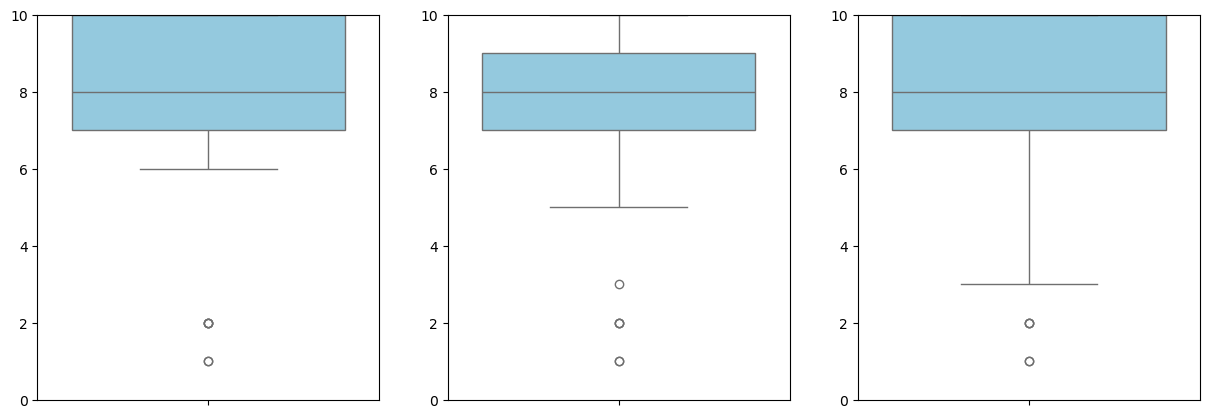

                                __   
  __ _ _ __ ___  _   _ _ __    / /_  
 / _` | '__/ _ \| | | | '_ \  | '_ \ 
| (_| | | | (_) | |_| | |_) | | (_) |
 \__, |_|  \___/ \__,_| .__/   \___/ 
 |___/                |_|            

average_before_cleaning = 7.7272727272727275
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 4     3.0
35    3.0
38    3.0
dtype: float64
average_after_cleaning = 7.9523809523809526


average_before_cleaning = 7.787878787878788
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 4    2.0
dtype: float64
average_after_cleaning = 7.876923076923077


average_before_cleaning = 7.7727272727272725
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 

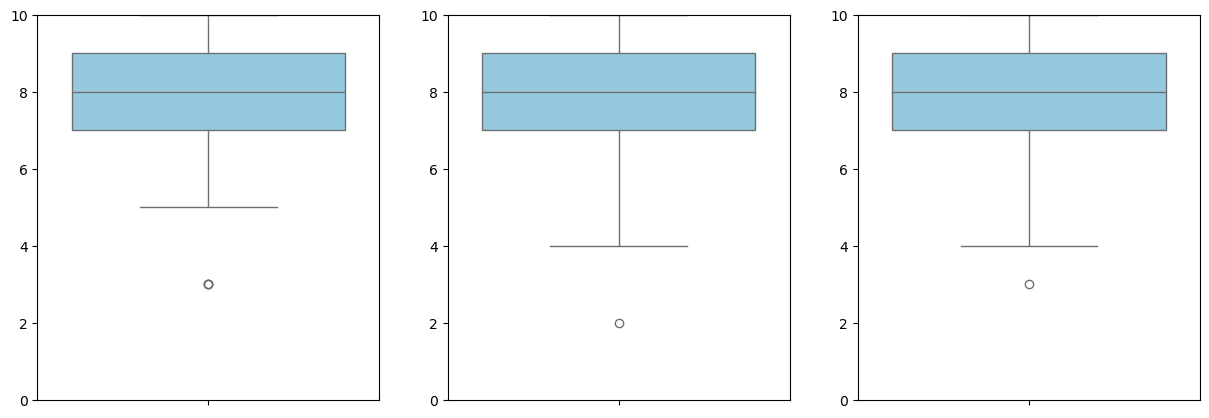

                               _____ 
  __ _ _ __ ___  _   _ _ __   |___  |
 / _` | '__/ _ \| | | | '_ \     / / 
| (_| | | | (_) | |_| | |_) |   / /  
 \__, |_|  \___/ \__,_| .__/   /_/   
 |___/                |_|            

average_before_cleaning = 8.36923076923077
*q1 = 8.0, q3 = 10.0, IQR = 2.0, lower_whisker = 5.0, upper_whisker = 13.0
*q1 = 8.0, q3 = 10.0, IQR = 2.0, lower_whisker = 5.0, upper_whisker = 13.0
Outliers:
 22    4.0
45    3.0
51    3.0
56    3.0
59    2.0
dtype: float64
average_after_cleaning = 8.816666666666666


average_before_cleaning = 8.2
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
Outliers:
 59    2.0
dtype: float64
average_after_cleaning = 8.296875


average_before_cleaning = 8.2
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
Outliers:
 45    2.0
51  

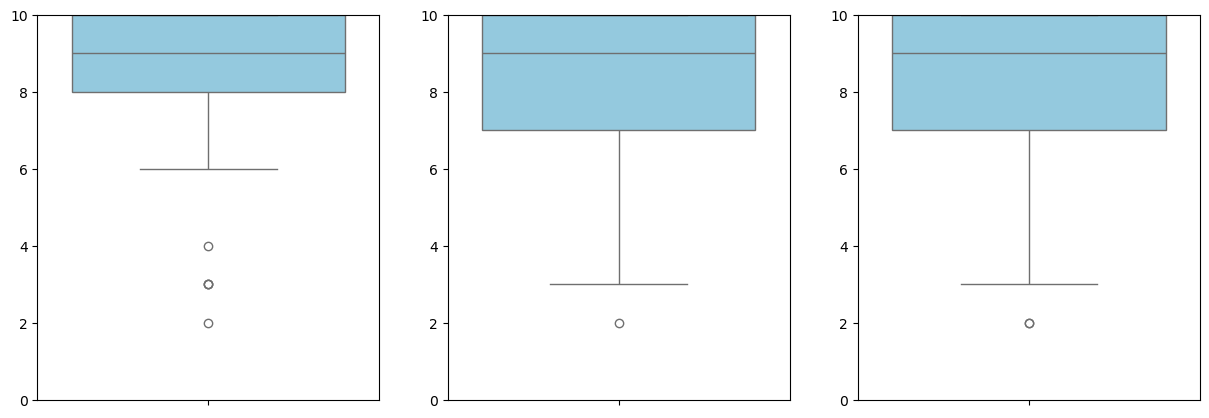

                                ___  
  __ _ _ __ ___  _   _ _ __    ( _ ) 
 / _` | '__/ _ \| | | | '_ \   / _ \ 
| (_| | | | (_) | |_| | |_) | | (_) |
 \__, |_|  \___/ \__,_| .__/   \___/ 
 |___/                |_|            

average_before_cleaning = 8.092307692307692
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 8.092307692307692


average_before_cleaning = 7.923076923076923
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 47    2.0
55    2.0
59    2.0
dtype: float64
average_after_cleaning = 8.209677419354838


average_before_cleaning = 8.015384615384615
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
Outlier

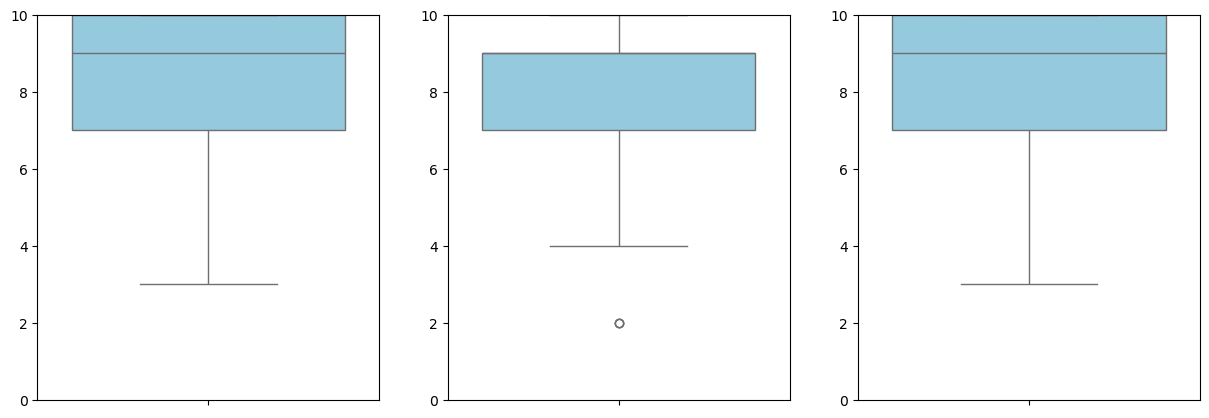

                                ___  
  __ _ _ __ ___  _   _ _ __    / _ \ 
 / _` | '__/ _ \| | | | '_ \  | (_) |
| (_| | | | (_) | |_| | |_) |  \__, |
 \__, |_|  \___/ \__,_| .__/     /_/ 
 |___/                |_|            

average_before_cleaning = 7.95
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
Outliers:
 40    2.0
52    2.0
dtype: float64
average_after_cleaning = 8.155172413793103


average_before_cleaning = 7.866666666666666
*q1 = 6.75, q3 = 10.0, IQR = 3.25, lower_whisker = 1.875, upper_whisker = 14.875
*q1 = 6.75, q3 = 10.0, IQR = 3.25, lower_whisker = 1.875, upper_whisker = 14.875
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 7.866666666666666


average_before_cleaning = 7.983333333333333
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
Outliers:
 Serie

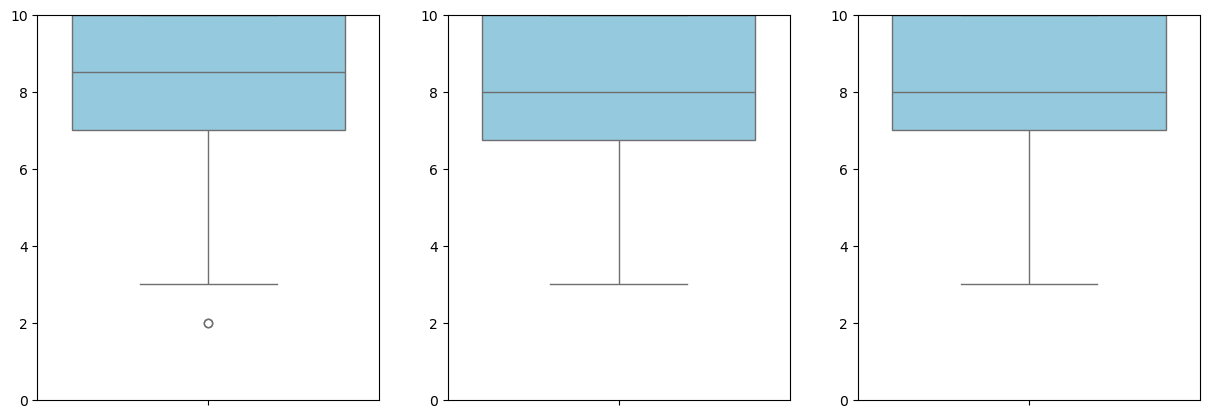

                               _  ___  
  __ _ _ __ ___  _   _ _ __   / |/ _ \ 
 / _` | '__/ _ \| | | | '_ \  | | | | |
| (_| | | | (_) | |_| | |_) | | | |_| |
 \__, |_|  \___/ \__,_| .__/  |_|\___/ 
 |___/                |_|              

average_before_cleaning = 8.016949152542374
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
Outliers:
 39    2.0
51    2.0
dtype: float64
average_after_cleaning = 8.228070175438596


average_before_cleaning = 7.915254237288136
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 7.915254237288136


average_before_cleaning = 8.033898305084746
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
*q1 = 7.0, q3 = 10.0, IQR = 3.0, lower_whisker = 2.5, upper_whisker = 14.5
Out

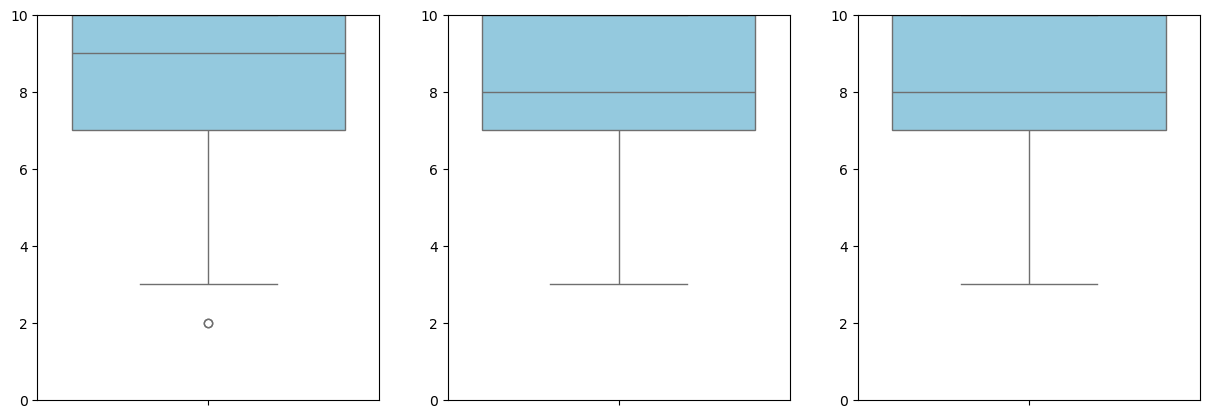

                               _ _ 
  __ _ _ __ ___  _   _ _ __   / / |
 / _` | '__/ _ \| | | | '_ \  | | |
| (_| | | | (_) | |_| | |_) | | | |
 \__, |_|  \___/ \__,_| .__/  |_|_|
 |___/                |_|          

average_before_cleaning = 7.225806451612903
*q1 = 6.0, q3 = 10.0, IQR = 4.0, lower_whisker = 0.0, upper_whisker = 16.0
*q1 = 6.0, q3 = 10.0, IQR = 4.0, lower_whisker = 0.0, upper_whisker = 16.0
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 7.225806451612903


average_before_cleaning = 7.241935483870968
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
Outliers:
 17    1.0
29    1.0
dtype: float64
average_after_cleaning = 7.45


average_before_cleaning = 7.370967741935484
*q1 = 6.0, q3 = 10.0, IQR = 4.0, lower_whisker = 0.0, upper_whisker = 16.0
*q1 = 6.0, q3 = 10.0, IQR = 4.0, lower_whisker = 0.0, upper_whisker = 16.0
Outliers:
 Series([], dtype: float64)
aver

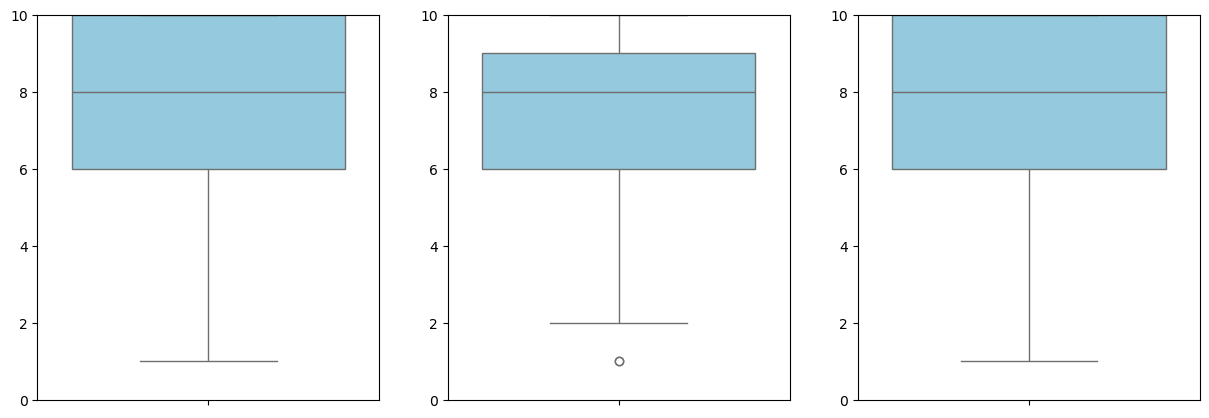

                               _ ____  
  __ _ _ __ ___  _   _ _ __   / |___ \ 
 / _` | '__/ _ \| | | | '_ \  | | __) |
| (_| | | | (_) | |_| | |_) | | |/ __/ 
 \__, |_|  \___/ \__,_| .__/  |_|_____|
 |___/                |_|              

average_before_cleaning = 6.583333333333333
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 6.583333333333333


average_before_cleaning = 6.666666666666667
*q1 = 5.0, q3 = 8.25, IQR = 3.25, lower_whisker = 0.125, upper_whisker = 13.125
*q1 = 5.0, q3 = 8.25, IQR = 3.25, lower_whisker = 0.125, upper_whisker = 13.125
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 6.666666666666667


average_before_cleaning = 6.5
*q1 = 5.0, q3 = 8.25, IQR = 3.25, lower_whisker = 0.125, upper_whisker = 13.125
*q1 = 5.0, q3 = 8.25, IQR = 3.25, lower_whisker = 0.125, upper_whisker = 13.125
Outli

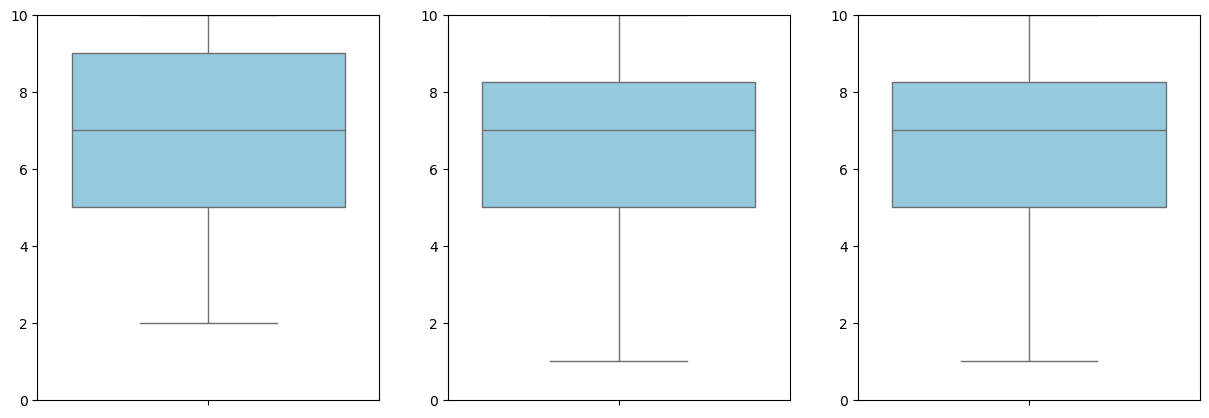

                               _ _____ 
  __ _ _ __ ___  _   _ _ __   / |___ / 
 / _` | '__/ _ \| | | | '_ \  | | |_ \ 
| (_| | | | (_) | |_| | |_) | | |___) |
 \__, |_|  \___/ \__,_| .__/  |_|____/ 
 |___/                |_|              

average_before_cleaning = 7.078125
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 7.078125


average_before_cleaning = 7.03125
*q1 = 6.0, q3 = 8.25, IQR = 2.25, lower_whisker = 2.625, upper_whisker = 11.625
*q1 = 6.0, q3 = 8.25, IQR = 2.25, lower_whisker = 2.625, upper_whisker = 11.625
Outliers:
 20    2.0
dtype: float64
average_after_cleaning = 7.111111111111111


average_before_cleaning = 6.96875
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
Outliers:
 Series([], dtype: float64)
average

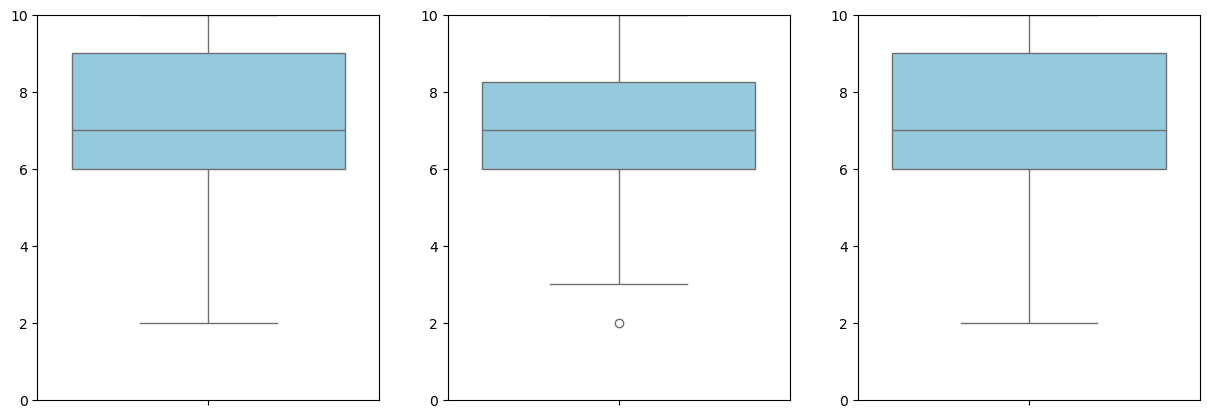

                               _ _  _   
  __ _ _ __ ___  _   _ _ __   / | || |  
 / _` | '__/ _ \| | | | '_ \  | | || |_ 
| (_| | | | (_) | |_| | |_) | | |__   _|
 \__, |_|  \___/ \__,_| .__/  |_|  |_|  
 |___/                |_|               

average_before_cleaning = 6.857142857142857
*q1 = 5.5, q3 = 9.0, IQR = 3.5, lower_whisker = 0.25, upper_whisker = 14.25
*q1 = 5.5, q3 = 9.0, IQR = 3.5, lower_whisker = 0.25, upper_whisker = 14.25
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 6.857142857142857


average_before_cleaning = 6.761904761904762
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
Outliers:
 17    1.0
23    1.0
24    1.0
41    1.0
61    1.0
dtype: float64
average_after_cleaning = 7.258620689655173


average_before_cleaning = 6.825396825396825
*q1 = 5.5, q3 = 9.0, IQR = 3.5, lower_whisker = 0.25, upper_whisker = 14.25
*q1 = 5.5, q3 = 9.0, IQR = 3.5, lower_whi

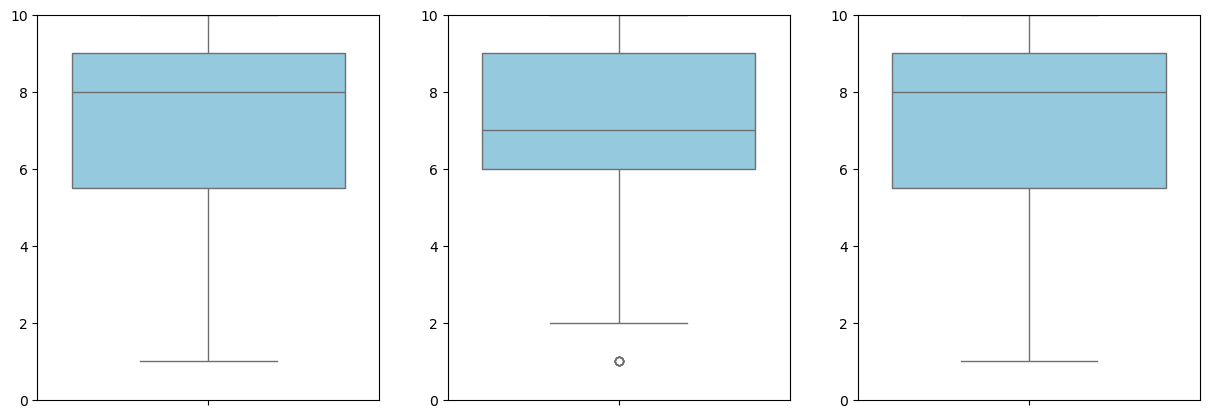

                               _ ____  
  __ _ _ __ ___  _   _ _ __   / | ___| 
 / _` | '__/ _ \| | | | '_ \  | |___ \ 
| (_| | | | (_) | |_| | |_) | | |___) |
 \__, |_|  \___/ \__,_| .__/  |_|____/ 
 |___/                |_|              

average_before_cleaning = 6.339622641509434
*q1 = 4.0, q3 = 9.0, IQR = 5.0, lower_whisker = -3.5, upper_whisker = 16.5
*q1 = 4.0, q3 = 9.0, IQR = 5.0, lower_whisker = -3.5, upper_whisker = 16.5
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 6.339622641509434


average_before_cleaning = 6.490566037735849
*q1 = 4.0, q3 = 9.0, IQR = 5.0, lower_whisker = -3.5, upper_whisker = 16.5
*q1 = 4.0, q3 = 9.0, IQR = 5.0, lower_whisker = -3.5, upper_whisker = 16.5
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 6.490566037735849


average_before_cleaning = 6.471698113207547
*q1 = 4.0, q3 = 9.0, IQR = 5.0, lower_whisker = -3.5, upper_whisker = 16.5
*q1 = 4.0, q3 = 9.0, IQR = 5.0, lower_whisker = -3.5, upper_whisker = 16.5
Outliers:
 

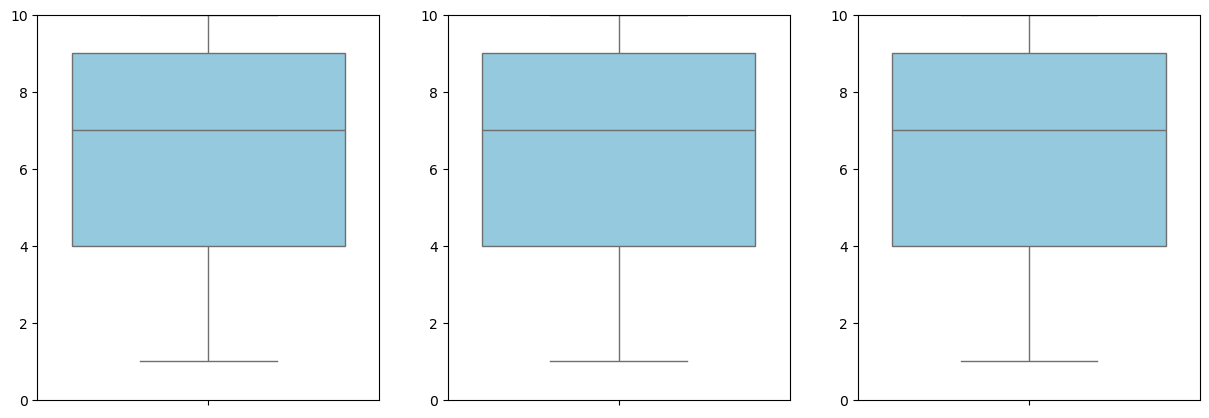

                               _  __   
  __ _ _ __ ___  _   _ _ __   / |/ /_  
 / _` | '__/ _ \| | | | '_ \  | | '_ \ 
| (_| | | | (_) | |_| | |_) | | | (_) |
 \__, |_|  \___/ \__,_| .__/  |_|\___/ 
 |___/                |_|              

average_before_cleaning = 7.2
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
Outliers:
 13    1.0
dtype: float64
average_after_cleaning = 7.305084745762712


average_before_cleaning = 7.066666666666666
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
Outliers:
 13    1.0
dtype: float64
average_after_cleaning = 7.169491525423729


average_before_cleaning = 7.033333333333333
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
Outliers:
 13    1.0
dtype: float64

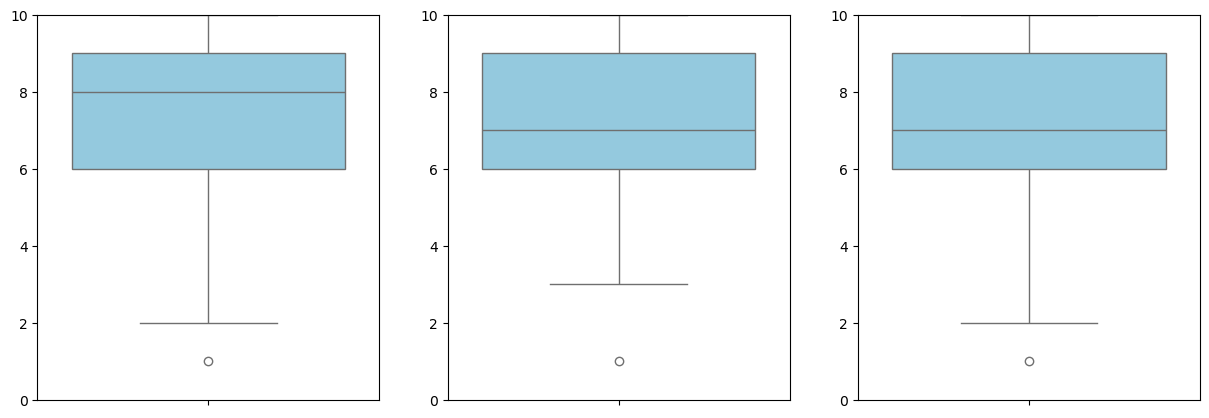

                               _ _____ 
  __ _ _ __ ___  _   _ _ __   / |___  |
 / _` | '__/ _ \| | | | '_ \  | |  / / 
| (_| | | | (_) | |_| | |_) | | | / /  
 \__, |_|  \___/ \__,_| .__/  |_|/_/   
 |___/                |_|              

average_before_cleaning = 6.868852459016393
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 6.868852459016393


average_before_cleaning = 6.786885245901639
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 6.786885245901639


average_before_cleaning = 6.819672131147541
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
Outliers:
 

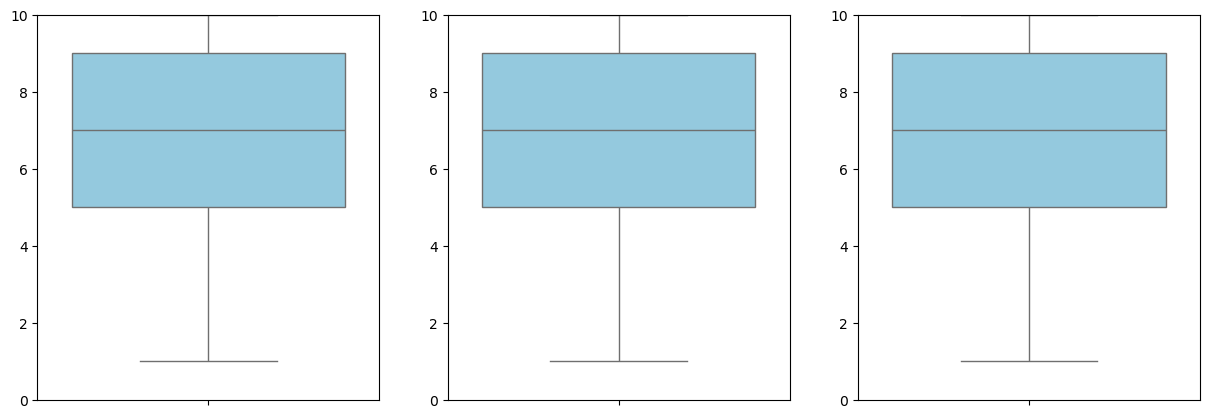

                               _  ___  
  __ _ _ __ ___  _   _ _ __   / |( _ ) 
 / _` | '__/ _ \| | | | '_ \  | |/ _ \ 
| (_| | | | (_) | |_| | |_) | | | (_) |
 \__, |_|  \___/ \__,_| .__/  |_|\___/ 
 |___/                |_|              

average_before_cleaning = 7.051724137931035
*q1 = 6.0, q3 = 9.75, IQR = 3.75, lower_whisker = 0.375, upper_whisker = 15.375
*q1 = 6.0, q3 = 9.75, IQR = 3.75, lower_whisker = 0.375, upper_whisker = 15.375
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 7.051724137931035


average_before_cleaning = 6.896551724137931
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
Outliers:
 12    1.0
22    1.0
30    1.0
32    1.0
46    1.0
48    1.0
50    1.0
dtype: float64
average_after_cleaning = 7.705882352941177


average_before_cleaning = 6.810344827586207
*q1 = 5.25, q3 = 9.0, IQR = 3.75, lower_whisker = -0.375, upper_whisker = 14.625
*q1 = 5.25, q3

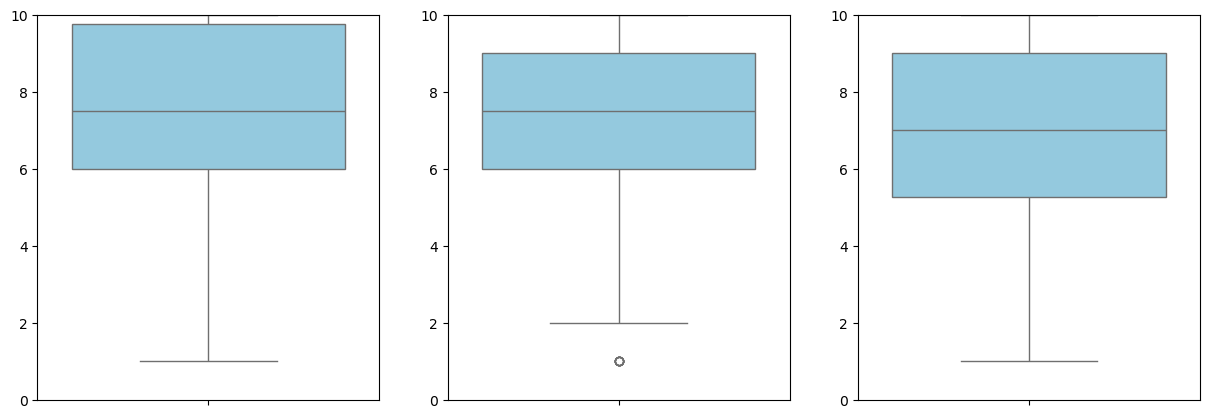

                               _  ___  
  __ _ _ __ ___  _   _ _ __   / |/ _ \ 
 / _` | '__/ _ \| | | | '_ \  | | (_) |
| (_| | | | (_) | |_| | |_) | | |\__, |
 \__, |_|  \___/ \__,_| .__/  |_|  /_/ 
 |___/                |_|              

average_before_cleaning = 7.363636363636363
*q1 = 6.25, q3 = 9.0, IQR = 2.75, lower_whisker = 2.125, upper_whisker = 13.125
*q1 = 6.25, q3 = 9.0, IQR = 2.75, lower_whisker = 2.125, upper_whisker = 13.125
Outliers:
 24    1.0
25    2.0
26    1.0
32    1.0
37    2.0
56    2.0
63    2.0
dtype: float64
average_after_cleaning = 8.05084745762712


average_before_cleaning = 7.318181818181818
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
Outliers:
 24    1.0
26    1.0
63    1.0
dtype: float64
average_after_cleaning = 7.619047619047619


average_before_cleaning = 7.151515151515151
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 

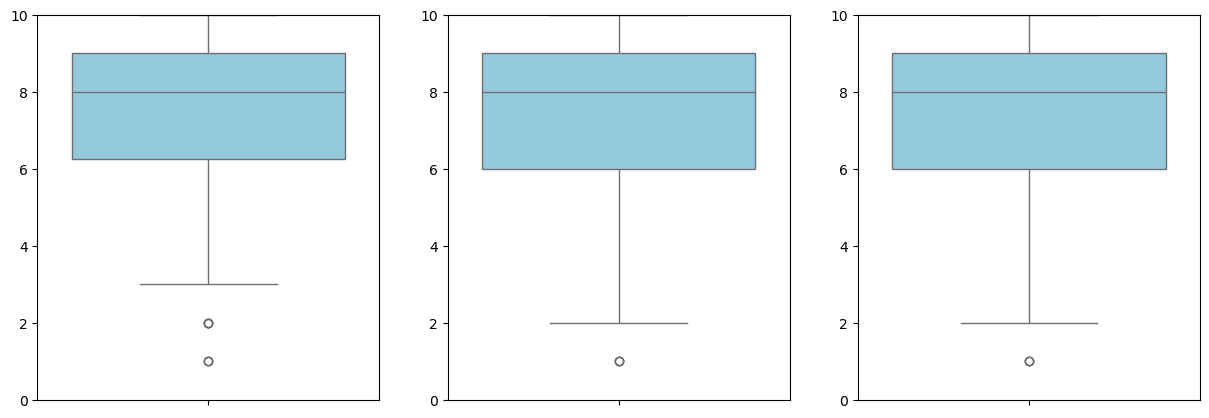

                               ____   ___  
  __ _ _ __ ___  _   _ _ __   |___ \ / _ \ 
 / _` | '__/ _ \| | | | '_ \    __) | | | |
| (_| | | | (_) | |_| | |_) |  / __/| |_| |
 \__, |_|  \___/ \__,_| .__/  |_____|\___/ 
 |___/                |_|                  

average_before_cleaning = 6.803571428571429
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 6.803571428571429


average_before_cleaning = 6.714285714285714
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
*q1 = 5.0, q3 = 9.0, IQR = 4.0, lower_whisker = -1.0, upper_whisker = 15.0
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 6.714285714285714


average_before_cleaning = 6.767857142857143
*q1 = 5.75, q3 = 9.0, IQR = 3.25, lower_whisker = 0.875, upper_whisker = 13.875
*q1 = 5.75, q3 = 9.0, IQR = 3.25, lower_whisker = 0.875, 

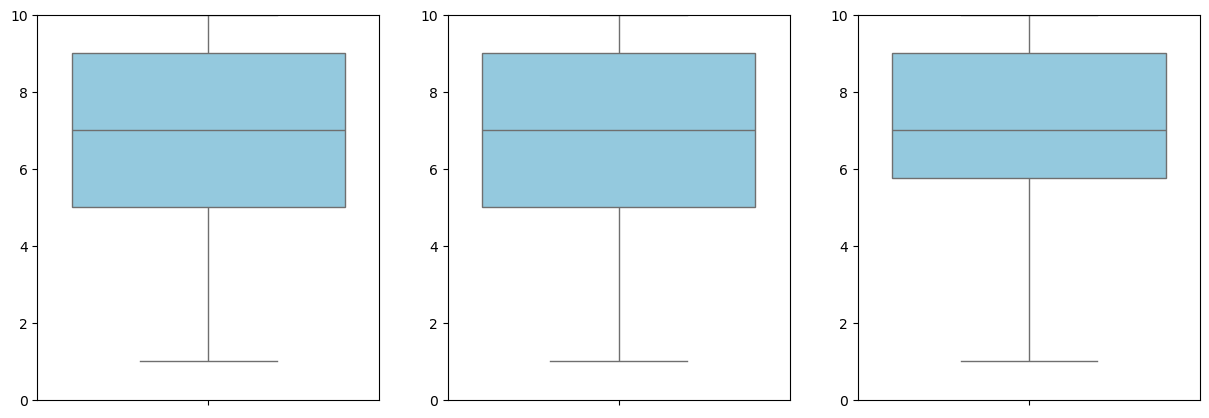

                               ____  _ 
  __ _ _ __ ___  _   _ _ __   |___ \/ |
 / _` | '__/ _ \| | | | '_ \    __) | |
| (_| | | | (_) | |_| | |_) |  / __/| |
 \__, |_|  \___/ \__,_| .__/  |_____|_|
 |___/                |_|              

average_before_cleaning = 7.574074074074074
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
*q1 = 6.0, q3 = 9.0, IQR = 3.0, lower_whisker = 1.5, upper_whisker = 13.5
Outliers:
 Series([], dtype: float64)
average_after_cleaning = 7.574074074074074


average_before_cleaning = 7.611111111111111
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers:
 13    3.0
47    2.0
dtype: float64
average_after_cleaning = 7.8076923076923075


average_before_cleaning = 7.611111111111111
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
*q1 = 7.0, q3 = 9.0, IQR = 2.0, lower_whisker = 4.0, upper_whisker = 12.0
Outliers

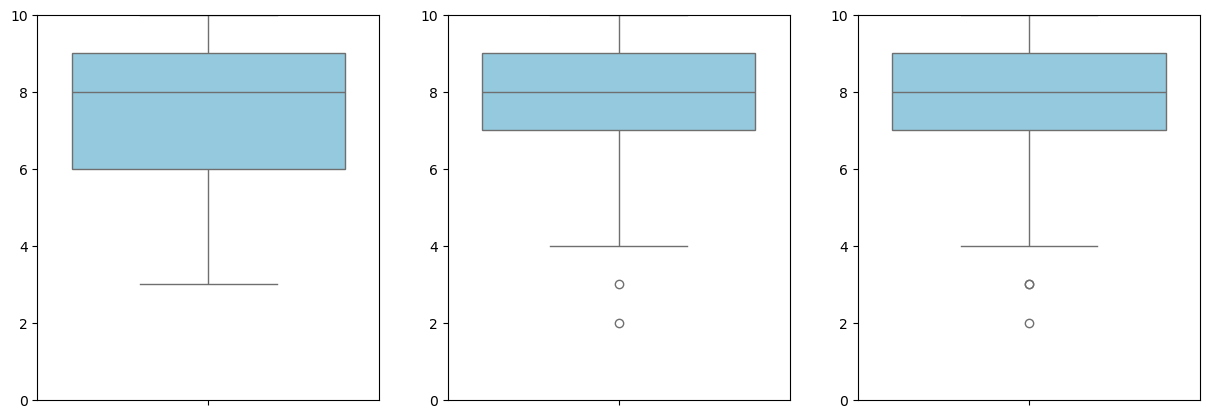

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# !pip install pyfiglet
import pyfiglet
banner = pyfiglet.figlet_format("Grades for group 1")

def graph_data(data, ax):
    sns.boxplot(data=data, color='skyblue', ax=ax)
    ax.set_ylim(0, 10)

outlying_students = {} # List of students who have given outlying grades, along with the number of outlying grades they have given
average_grades_before_after: List[Tuple[float, float, float, float, float, float]] = []
for group_idx, group in enumerate(presentation_data):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    student_emails = group[0]
    grades_for_group = [] 
    print(pyfiglet.figlet_format(f"group {group_idx+1}"))
    for i, grades in enumerate(group[1:]):
        print(f'average_before_cleaning = {pd.Series(grades).mean()}')
        grades_for_group.append(pd.Series(grades).mean())
        outliers = get_outliers_iqr(pd.Series(grades))
        # based on the outliers index ( ) we can get the email of the student
        for idx in outliers.index:
            if student_emails[idx] in outlying_students:
                outlying_students[student_emails[idx]] += 1
            else:
                outlying_students[student_emails[idx]] = 1
        filtered_data = get_filtered_data_iqr(pd.Series(grades))
        print("Outliers:\n", outliers.dropna())
        print(f'average_after_cleaning = {pd.Series(filtered_data).mean()}\n\n')
        grades_for_group.append(pd.Series(filtered_data).mean())
        graph_data(pd.Series(grades), axes[i])
    plt.show()
    average_grades_before_after.append(tuple(grades_for_group))
    # print("\n\n\n")
    


In [21]:
df = pd.DataFrame(average_grades_before_after, columns=["Overall grade's Slide deck? (before)", "Overall grade's Slide deck? (after)", 
                                                   "Overall grade Presentation skills(Before)?", "Overall grade Presentation skills(After)?",
                                                   "Overall grade Research topic paper content?(before)", "Overall grade Research topic paper content?(after)"
                                                   ])
# Set the index name
df.index.name = 'Group Number'

# Calculate the before and after averages
df['Before Average'] = df[[
    "Overall grade's Slide deck? (before)", 
    "Overall grade Presentation skills(Before)?", 
    "Overall grade Research topic paper content?(before)"
]].mean(axis=1)

df['After Average'] = df[[
    "Overall grade's Slide deck? (after)", 
    "Overall grade Presentation skills(After)?", 
    "Overall grade Research topic paper content?(after)"
]].mean(axis=1)

# Add a column that compares the before and after averages
df['Grade difference'] = df['After Average'] - df['Before Average']

# Display the DataFrame
df


,Overall grade's Slide deck? (before),Overall grade's Slide deck? (after),Overall grade Presentation skills(Before)?,Overall grade Presentation skills(After)?,Overall grade Research topic paper content?(before),Overall grade Research topic paper content?(after),Before Average,After Average,Grade difference
Group Number,,,,,,,,,
0,7.553571,7.980769,7.696429,8.153846,7.625000,8.076923,7.625000,8.070513,0.445513
1,7.781818,8.360000,7.727273,8.300000,7.836364,8.192308,7.781818,8.284103,0.502284
2,7.920635,8.578947,7.952381,8.625000,8.015873,8.423729,7.962963,8.542559,0.579596
3,8.311475,8.821429,8.344262,8.857143,8.278689,8.750000,8.311475,8.809524,0.498048
4,7.800000,8.423729,7.784615,8.389831,7.892308,8.416667,7.825641,8.410075,0.584434
5,7.727273,7.952381,7.787879,7.876923,7.772727,7.846154,7.762626,7.891819,0.129193
6,8.369231,8.816667,8.200000,8.296875,8.200000,8.396825,8.256410,8.503456,0.247045
7,8.092308,8.092308,7.923077,8.209677,8.015385,8.015385,8.010256,8.105790,0.095533
8,7.950000,8.155172,7.866667,7.866667,7.983333,7.983333,7.933333,8.001724,0.068391


In [22]:
print("List of students who have given outlying grades, along with the number of outlying grades they have given")
for student, count in sorted(outlying_students.items(), key=lambda x: x[1], reverse=True):
    print(f"{student}: {count}")

List of students who have given outlying grades, along with the number of outlying grades they have given
abc022@student.csulb.edu: 23
abc003@student.csulb.edu: 16
abc037@student.csulb.edu: 16
abc039@student.csulb.edu: 16
abc005@student.csulb.edu: 16
abc067@student.csulb.edu: 12
abc008@student.csulb.edu: 5
abc064@student.csulb.edu: 3
abc020@student.csulb.edu: 3
abc081@student.csulb.edu: 2
abc007@student.csulb.edu: 2
abc001@student.csulb.edu: 2
samyugdharadhakrishnan@gmail.com: 2
abc026@student.csulb.edu: 2
geethikapenukula@gmail.com: 2
abc055@student.csulb.edu: 1
abc065@student.csulb.edu: 1
abc006@student.csulb.edu: 1
bk.mamatha.bk@gmail.com: 1
abc054@student.csulb.edu: 1
Yogeshreameshbhai.dholakiya01@student.csulb.edu: 1
geethikapenukula01@student.csulb.edu: 1
abc070@student.csulb.edu: 1
